In [27]:
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet
df = pd.read_csv("./input/ethereumprice_org.csv",parse_dates=True)
df['ds'] = pd.to_datetime(df.timestamp, unit='s')
df.set_index('ds')
df.head()


,timestamp,open,high,low,close,ds
0,1623888000,2367.730000,undefined,undefined,undefined,2021-06-17 00:00:00
1,1623801600,2543.372320,2553.08,2353.51,2367.4,2021-06-16 00:00:00
2,1623715200,2582.483512,2638.26,2514.11,2545.13,2021-06-15 00:00:00
3,1623628800,2515.990000,2604.018280095319,2470.59,2583.27,2021-06-14 00:00:00
4,1623628740,2509.820000,undefined,undefined,undefined,2021-06-13 23:59:00


In [28]:
df_eth = df[["ds", "open"]]  
df_eth.rename(columns={"ds":"ds", "open": "y"}, inplace=True)
df_eth.resample('D', on='ds').mean()
df_eth=df_eth.dropna()
df_eth.set_index("ds")
df_eth.tail()


C:\Users\Arvind\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
2236,2015-08-11,0.99
2237,2015-08-10,1.20
2238,2015-08-09,1.20
2239,2015-08-08,1.20
2240,2015-08-07,3.00


In [36]:
def addGain(df):
    df['next'] = df['y'].shift(-1)
    df['perc'] = 100*(df['next'] - df['y'])/df['y']
    return df

def conv_to_months(df):
    monthIndex = pd.DatetimeIndex(df.ds).to_period('M')
    df['month'] = monthIndex.month
    df_group = df.groupby(monthIndex).nth(0)
    df_group=addGain(df_group)
    return df_group

df_eth_first_month=conv_to_months(df_eth)

df_eth_first_month.head()


,ds,y,month,next,perc
ds,,,,,
2015-08,2015-08-31,1.3100,8,0.7137,-45.519084
2015-09,2015-09-30,0.7137,9,0.8676,21.563682
2015-10,2015-10-31,0.8676,10,0.8800,1.429230
2015-11,2015-11-30,0.8800,11,0.9488,7.818182
2015-12,2015-12-31,0.9488,12,2.2000,131.871838


In [10]:
df_month=df_eth_first_month.groupby(['month']).mean()
df_month.head()


,y,next,perc
month,,,
1,454.876001,449.624623,46.152139
2,449.624623,428.801141,37.732312
3,428.801141,648.950285,38.717159
4,648.950285,668.474049,49.645324
5,668.474049,610.375985,-0.306336


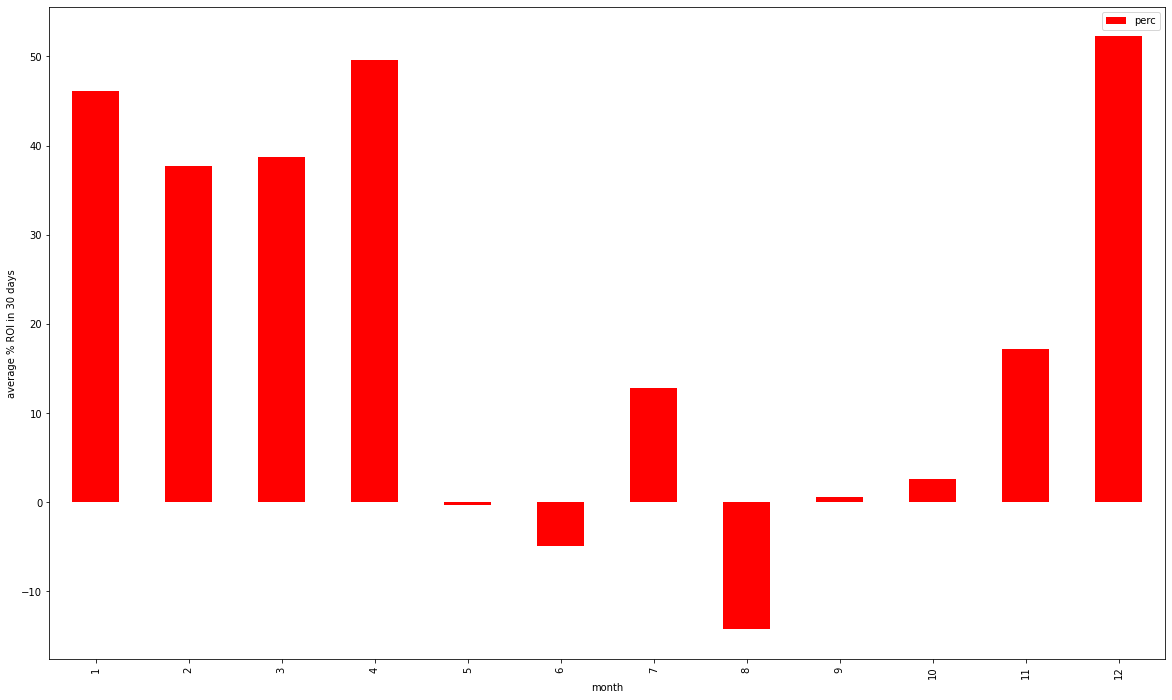

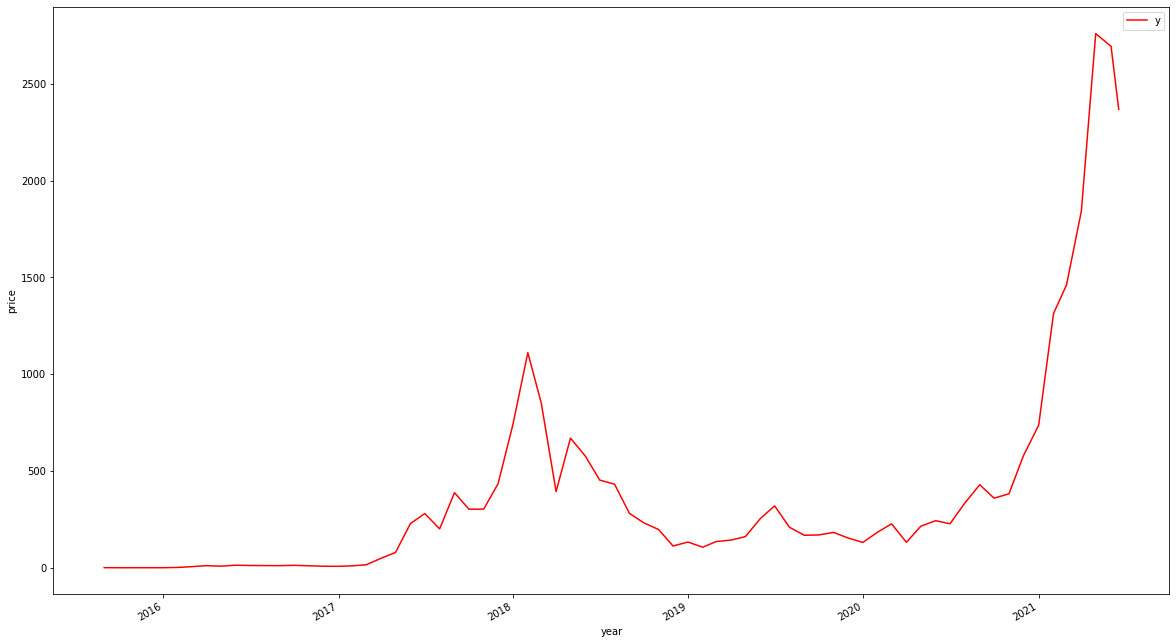

In [12]:

plt1=df_month.plot(kind='bar',y='perc',color='red',logy=1,ylabel='average % ROI in 30 days',xlabel='month',figsize=(20, 12))


ax2=df_eth_first_month.plot(kind='line',x='ds',y='y',color='red',logy=1,ylabel='price',xlabel='year',figsize=(20, 12))
